# Patent Application Data Analysis

This notebook presents a comprehensive analysis of patent applications and grants based on weekly data collected from various IPO (Indian Patent Office) locations.

###  Objective:
To explore patterns in patent applications and grants, uncover trends by **location**, **invention field**, and **claims/pages**, and derive insights from the types and frequency of filed inventions.

###  Dataset Note:
The dataset is a **consolidated combination of data from four IPO locations** — **Delhi, Mumbai, Chennai, and Kolkata**.  
Merging these into a single dataset enables a **larger and more representative analysis**, allowing for cross-location comparisons and broader insights into patenting activity across India.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Weekly_Patent_Application_Granted.csv", low_memory=False)
df.head()

,PUBLICATION_NUMBER,PUBLICATION_DATE,IPO_LOCATION,APPLICATION_TYPE_DESC,APPLICATION_NUMBER,DATE_OF_FILING,TITLE_OF_INVENTION,FIELD_OF_INVENTION,NO_OF_PAGES,NO_OF_CLAIMS
0,50/2016,02/12/2016,Kolkata,CONVENTION APPLICATION,108/KOL/2009,20/01/2009,MULTI-SPEED TRANSAXLE FOR A FRONT WHEEL DRIVE ...,MECHANICAL,26,21
1,50/2016,02/12/2016,Kolkata,PCT NATIONAL PHASE APPLICATION,1777/KOLNP/2010,17/05/2010,PROCESS FOR PREPARING TUBULYSINS,CHEMISTRY,38,12
2,52/2016,16/12/2016,Kolkata,PCT NATIONAL PHASE APPLICATION,2277/KOLNP/2010,22/06/2010,TEXTILE SEMIFINISHED PRODUCT WITH AT LEAST ONE...,POLYMER,13,14
3,53/2016,23/12/2016,Kolkata,PCT NATIONAL PHASE APPLICATION,2537/KOLNP/2010,13/07/2010,DESALINATION SYSTEM AND ELEMENTS THEREOF,CHEMISTRY,67,15
4,53/2016,23/12/2016,Kolkata,PCT NATIONAL PHASE APPLICATION,3269/KOLNP/2010,03/09/2010,"METHOD FOR PREPARING 2,3,3,3-TETRAFLUORO-1-PRO...",CHEMISTRY,17,15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286678 entries, 0 to 286677
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   PUBLICATION_NUMBER     286678 non-null  object
 1   PUBLICATION_DATE       286678 non-null  object
 2   IPO_LOCATION           286678 non-null  object
 3   APPLICATION_TYPE_DESC  286678 non-null  object
 4   APPLICATION_NUMBER     286678 non-null  object
 5   DATE_OF_FILING         286678 non-null  object
 6   TITLE_OF_INVENTION     286678 non-null  object
 7   FIELD_OF_INVENTION     286452 non-null  object
 8   NO_OF_PAGES            286678 non-null  int64 
 9   NO_OF_CLAIMS           286678 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 21.9+ MB


#### Total number of records 286685

In [4]:
df.shape

(286678, 10)

#### 286685 rows and 10 columns

In [5]:
# Convert date columns to datetime format
df['PUBLICATION_DATE'] = pd.to_datetime(df['PUBLICATION_DATE'], 
                                        errors='coerce', format='%d/%m/%Y')
df['DATE_OF_FILING'] = pd.to_datetime(df['DATE_OF_FILING'],
                                      errors='coerce', format='%d/%m/%Y')

# Convert NO_OF_PAGES and NO_OF_CLAIMS to numeric, coercing errors to NaN
df["NO_OF_PAGES"] = pd.to_numeric(df["NO_OF_PAGES"], errors="coerce")
df["NO_OF_CLAIMS"] = pd.to_numeric(df["NO_OF_CLAIMS"], errors="coerce")
# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill missing categorical values with unknown value
categorical_cols = ["IPO_LOCATION", "APPLICATION_TYPE_DESC",
                    "APPLICATION_NUMBER", "TITLE_OF_INVENTION", 
                    "FIELD_OF_INVENTION"]
df[categorical_cols] = df[categorical_cols].fillna("Unknown")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286678 entries, 0 to 286677
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   PUBLICATION_NUMBER     286678 non-null  object        
 1   PUBLICATION_DATE       286678 non-null  datetime64[ns]
 2   IPO_LOCATION           286678 non-null  object        
 3   APPLICATION_TYPE_DESC  286678 non-null  object        
 4   APPLICATION_NUMBER     286678 non-null  object        
 5   DATE_OF_FILING         286678 non-null  datetime64[ns]
 6   TITLE_OF_INVENTION     286678 non-null  object        
 7   FIELD_OF_INVENTION     286678 non-null  object        
 8   NO_OF_PAGES            286678 non-null  int64         
 9   NO_OF_CLAIMS           286678 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 21.9+ MB


### Converting the date columns to datetime format and two columns to numeric.
### We have used "coerce" for invalid data parsing, which will be set as NaN.


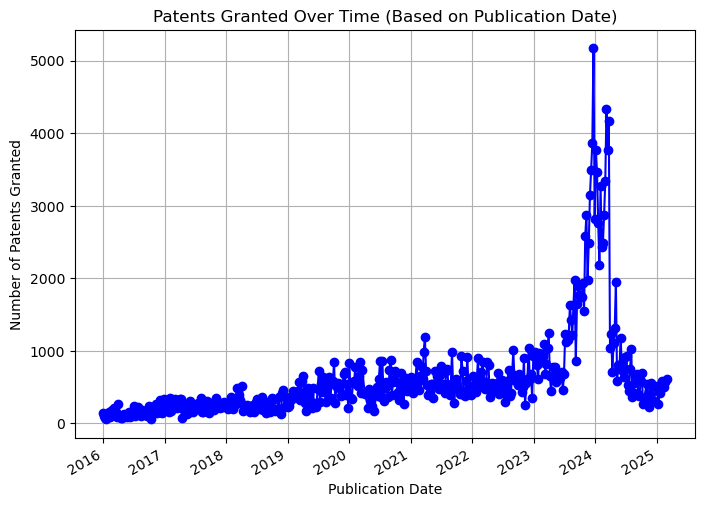

In [6]:
plt.figure(figsize=(8,6))
df.groupby('PUBLICATION_DATE').size().plot(kind='line', marker='o', color='b')
plt.xlabel('Publication Date')
plt.ylabel('Number of Patents Granted')
plt.title('Patents Granted Over Time (Based on Publication Date)')
plt.grid(True)
plt.show()

#### In 2023, the number of patents granted has increased over time.


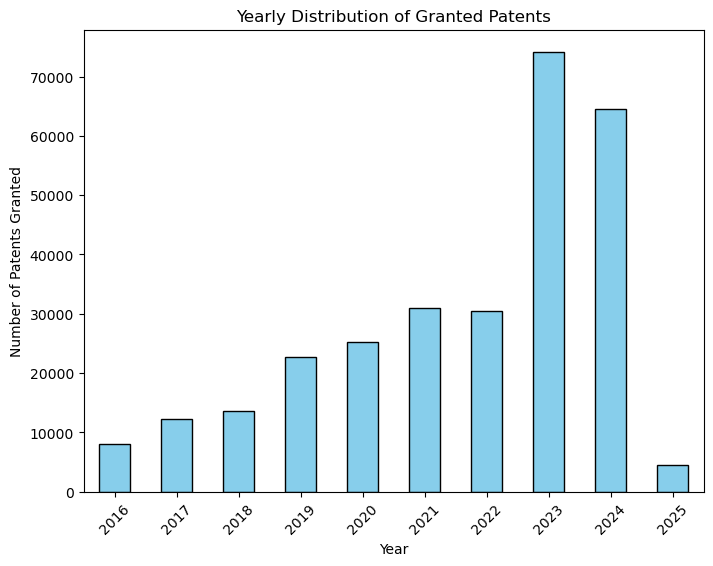

In [7]:
plt.figure(figsize=(8, 6))
df["PUBLICATION_DATE"].dt.year.value_counts().sort_index().plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Year")
plt.ylabel("Number of Patents Granted")
plt.title("Yearly Distribution of Granted Patents")
plt.xticks(rotation=45)  
plt.show()

#### The maximum number of patents were granted in 2023, while the minimum were granted in 2025.


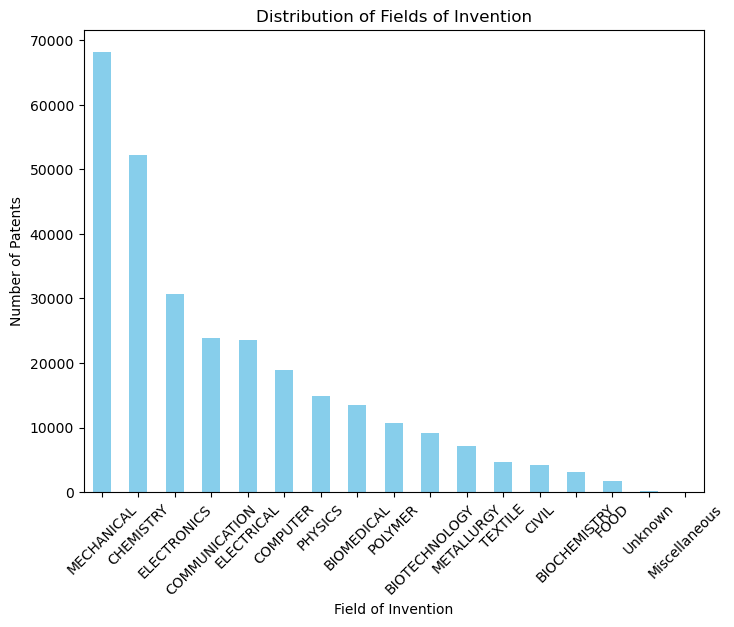

In [8]:
plt.figure(figsize=(8, 6))
df['FIELD_OF_INVENTION'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Field of Invention')
plt.ylabel('Number of Patents')
plt.title('Distribution of Fields of Invention')
plt.xticks(rotation=45)
plt.show()

#### The maximum number of patents were filed in the Mechanical field. while minimum in Food field

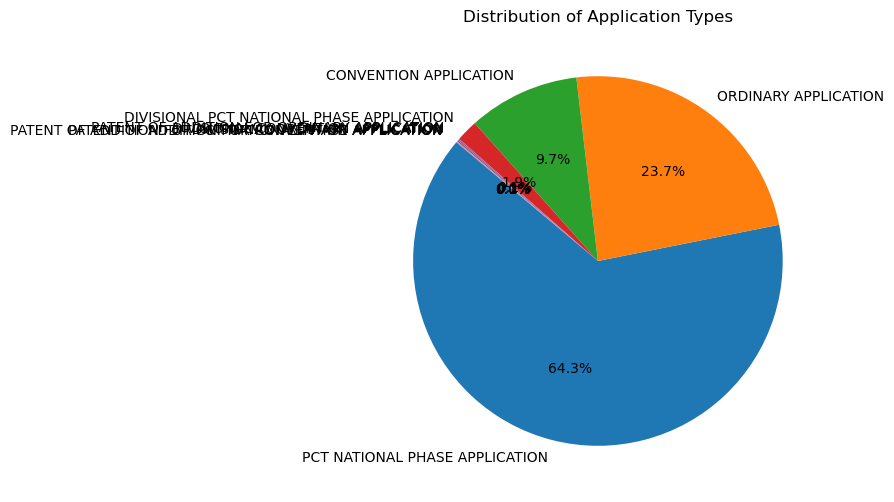

In [9]:
plt.figure(figsize=(8, 6))
df['APPLICATION_TYPE_DESC'].value_counts().plot(kind='pie', 
                            autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Application Types')
plt.ylabel('')
plt.show()

In [10]:
df['APPLICATION_TYPE_DESC'].value_counts()

APPLICATION_TYPE_DESC
PCT NATIONAL PHASE APPLICATION                           184202
ORDINARY APPLICATION                                      68002
CONVENTION APPLICATION                                    27943
DIVISIONAL PCT NATIONAL PHASE APPLICATION                  5460
PATENT OF ADDITION FOR ORDINARY APPLICATION                 426
DIVISIONAL CONVENTION APPLICATION                           343
DIVISIONAL ORDINARY APPLICATION                             265
PATENT OF ADDITION FOR PCT NATIONAL PHASE APPLICATION        30
PATENT OF ADDITION FOR CONVENTION APPLICATION                 7
Name: count, dtype: int64

#### The maximum number of patents were of type "PCT National Phase Application," while the minimum were "Patent of Addition for Convention Application."


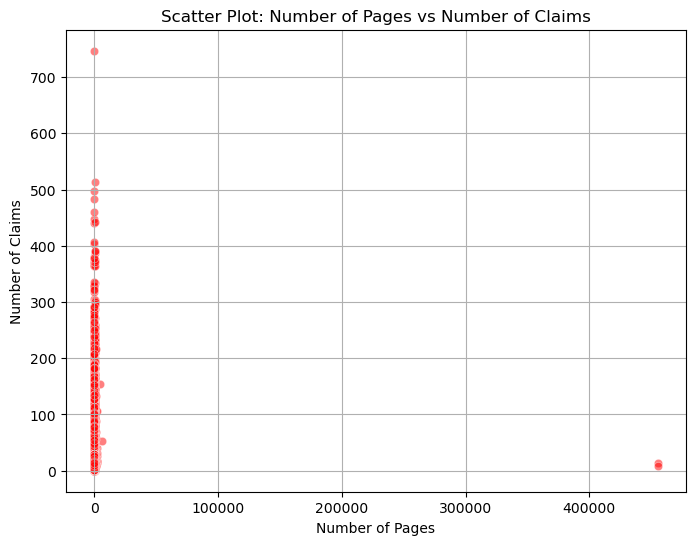

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['NO_OF_PAGES'], y=df['NO_OF_CLAIMS'], alpha=0.5, color='red')
plt.xlabel('Number of Pages')
plt.ylabel('Number of Claims')
plt.title('Scatter Plot: Number of Pages vs Number of Claims')
plt.grid(True)
plt.show()

In [12]:
df.NO_OF_PAGES.value_counts().sort_index()

NO_OF_PAGES
0         252
1          26
2          26
3          74
4         149
         ... 
2622        3
2643        1
4938        1
6786        1
455164      2
Name: count, Length: 774, dtype: int64

#### The maximum number of pages used for two patents is 455,164.


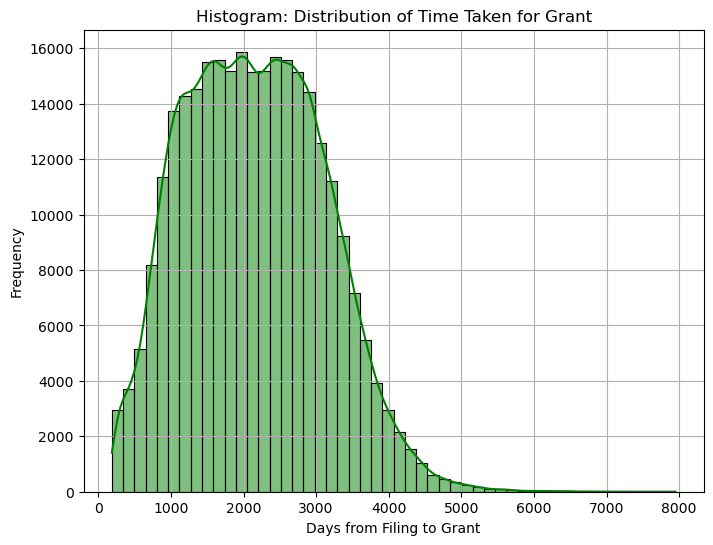

In [13]:
df['Time_to_Grant'] = (df['PUBLICATION_DATE'] - df['DATE_OF_FILING']).dt.days

plt.figure(figsize=(8, 6))
sns.histplot(df['Time_to_Grant'].dropna(), bins=50, kde=True, color='green')
plt.xlabel('Days from Filing to Grant')
plt.ylabel('Frequency')
plt.title('Histogram: Distribution of Time Taken for Grant')
plt.grid(True)
plt.show()

#### Calculated the time taken to grant a patent by measuring the time period between the publication date and the filing date.


C:\Users\aslmy\AppData\Local\Temp\ipykernel_11136\124206206.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='APPLICATION_TYPE_DESC', y='NO_OF_CLAIMS', data=df, palette="Set2")


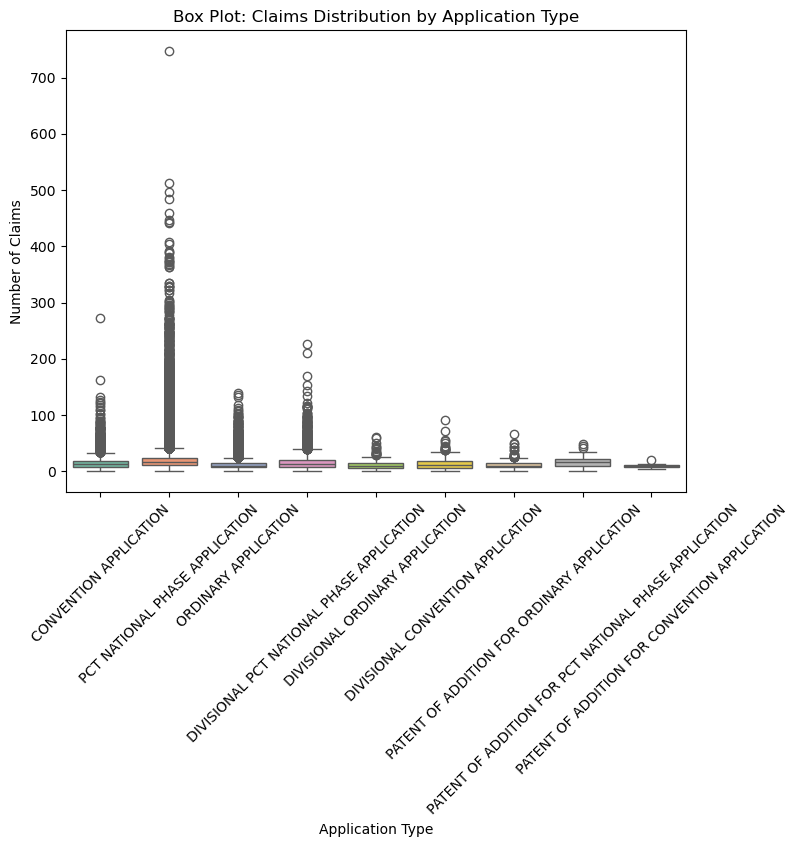

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(x='APPLICATION_TYPE_DESC', y='NO_OF_CLAIMS', data=df, palette="Set2")
plt.xlabel('Application Type')
plt.ylabel('Number of Claims')
plt.title('Box Plot: Claims Distribution by Application Type')
plt.xticks(rotation=45)
plt.show()

### There are more outliers in the PCT National Phase Application compared to all other application types in the number of claims.


C:\Users\aslmy\AppData\Local\Temp\ipykernel_11136\3915187114.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="IPO_LOCATION", palette="Set2", order=df["IPO_LOCATION"].value_counts().index)


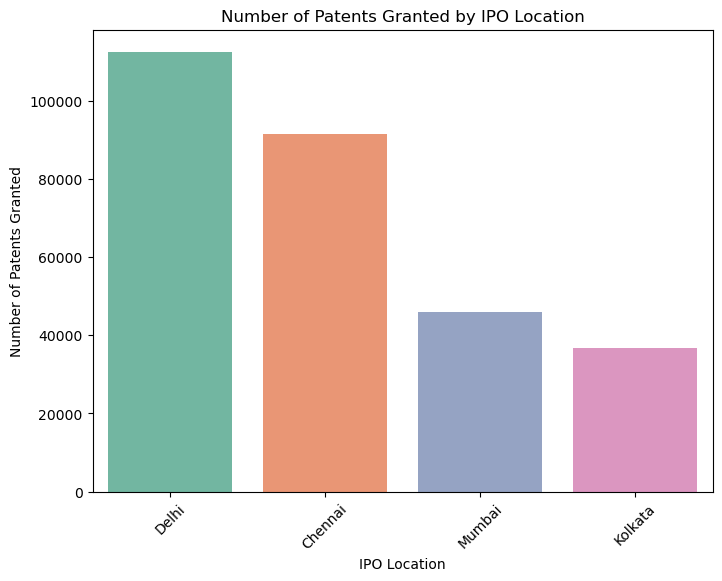

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="IPO_LOCATION", palette="Set2", order=df["IPO_LOCATION"].value_counts().index)
plt.xlabel("IPO Location")
plt.ylabel("Number of Patents Granted")
plt.title("Number of Patents Granted by IPO Location")
plt.xticks(rotation=45)  
plt.show()

#### The Delhi IPO location has the highest number of patents granted.  
#### The Kolkata IPO location has the least number of patents granted.


<Figure size 800x600 with 0 Axes>

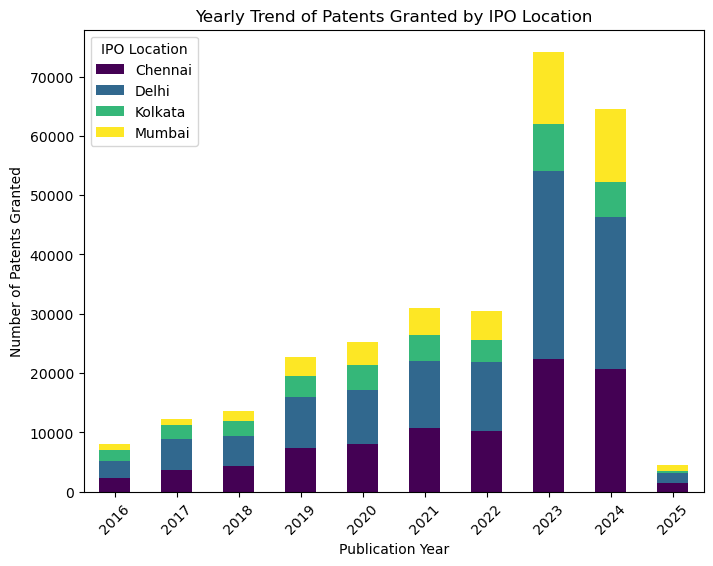

In [16]:
plt.figure(figsize=(8, 6))

df.groupby([df["PUBLICATION_DATE"].dt.year, "IPO_LOCATION"]).size().unstack().plot(
    kind="bar",
    stacked=True,
    figsize=(8, 6),
    colormap="viridis"
)
plt.xlabel("Publication Year")
plt.ylabel("Number of Patents Granted")
plt.title("Yearly Trend of Patents Granted by IPO Location")
plt.legend(title="IPO Location")
plt.xticks(rotation=45)
plt.show()


#### In 2023, there was a sudden increase in the number of patents granted across all IPO locations, followed by 2024, and then a decrease in 2025.


<Figure size 800x600 with 0 Axes>

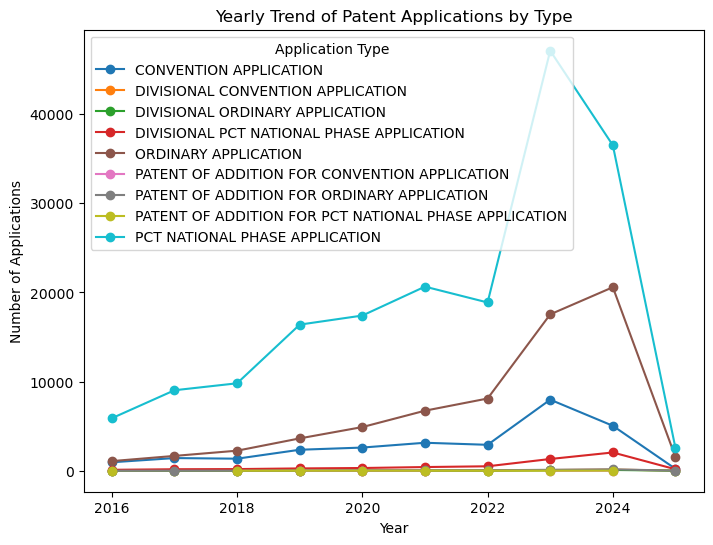

In [17]:
df["YEAR"] = df["PUBLICATION_DATE"].dt.year
app_df = df.groupby(["YEAR", "APPLICATION_TYPE_DESC"]).size().unstack()

plt.figure(figsize=(8, 6))
app_df.plot(kind="line", marker="o", colormap="tab10", figsize=(8, 6))
plt.xlabel("Year")
plt.ylabel("Number of Applications")
plt.title("Yearly Trend of Patent Applications by Type")
plt.legend(title="Application Type")
plt.show()

#### PCT National Phase Application had the highest number of applications in 2023.


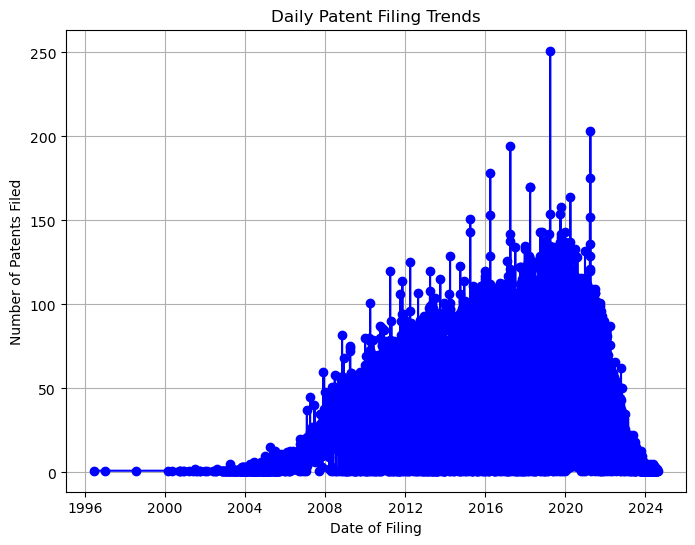

In [18]:
daily_counts = df.groupby(df["DATE_OF_FILING"].dt.date).size()
plt.figure(figsize=(8, 6))
daily_counts.plot(kind="line", marker="o", color="b")
plt.xlabel("Date of Filing")
plt.ylabel("Number of Patents Filed")
plt.title("Daily Patent Filing Trends")
plt.grid(True)
plt.show()

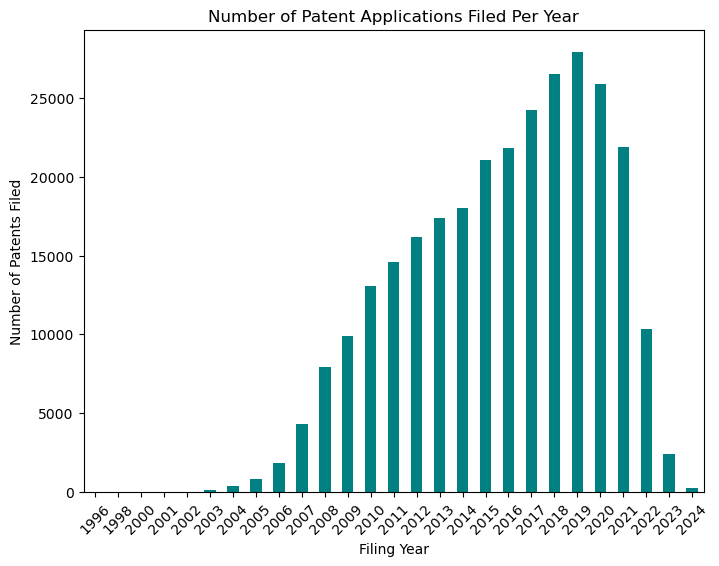

In [19]:
plt.figure(figsize=(8, 6))

df["FILING_YEAR"] = df["DATE_OF_FILING"].dt.year
df["FILING_YEAR"].value_counts().sort_index().plot(kind="bar", color="teal")
plt.xlabel("Filing Year")
plt.ylabel("Number of Patents Filed")
plt.title("Number of Patent Applications Filed Per Year")
plt.xticks(rotation=45)
plt.show()


#### Between 2017 and 2021, the highest number of patents were filed.


C:\Users\aslmy\AppData\Local\Temp\ipykernel_11136\3749819156.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="FILING_MONTH", palette="muted")


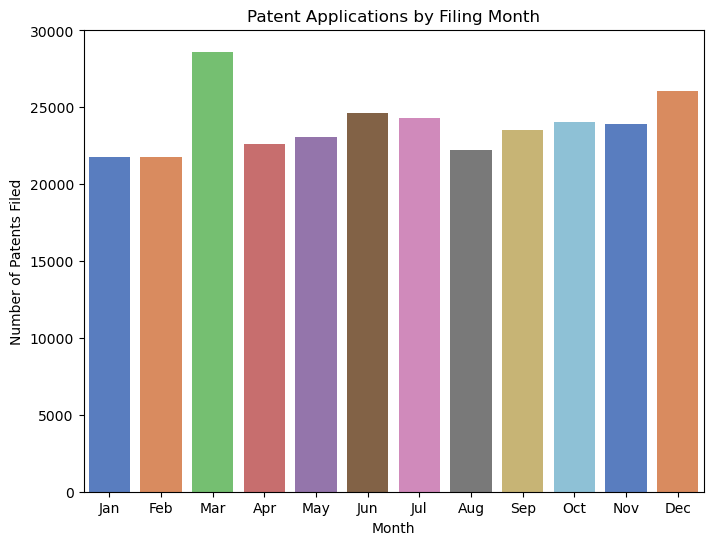

In [20]:
plt.figure(figsize=(8, 6))
df["FILING_MONTH"] = df["DATE_OF_FILING"].dt.month
sns.countplot(data=df, x="FILING_MONTH", palette="muted")
plt.xlabel("Month")
plt.ylabel("Number of Patents Filed")
plt.xticks(range(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title("Patent Applications by Filing Month")
plt.show()

#### The maximum number of patents were filed in March, while the minimum were filed in January and February.


<Figure size 800x600 with 0 Axes>

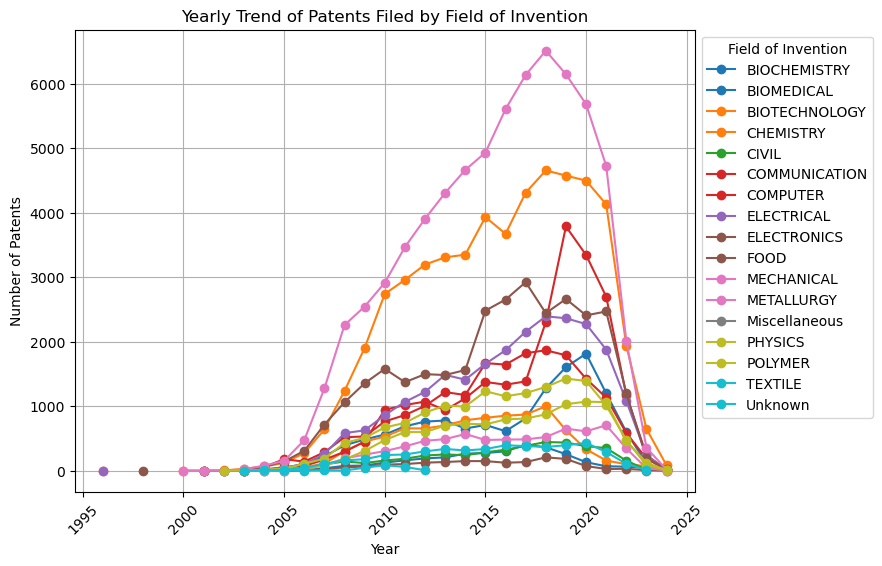

In [21]:
plt.figure(figsize=(8, 6))

df["FILING_YEAR"] = df["DATE_OF_FILING"].dt.year
yearly_field_counts = df.groupby(["FILING_YEAR", "FIELD_OF_INVENTION"]).size().unstack()
yearly_field_counts.plot(kind="line", marker="o", colormap="tab10", figsize=(8, 6))
plt.xlabel("Year")
plt.ylabel("Number of Patents")
plt.title("Yearly Trend of Patents Filed by Field of Invention")
plt.legend(title="Field of Invention", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#### In the fields of Mechanical and Biotechnology, the highest number of patents were filed between 2015 and 2020.


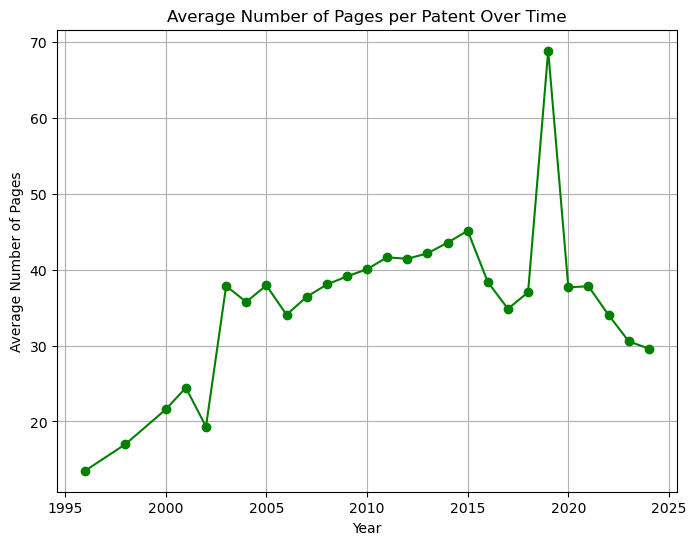

In [22]:
plt.figure(figsize=(8, 6))
yearly_avg_pages = df.groupby("FILING_YEAR")["NO_OF_PAGES"].mean()
yearly_avg_pages.plot(kind="line", marker="o", color="green", linestyle="-")
plt.xlabel("Year")
plt.ylabel("Average Number of Pages")
plt.title("Average Number of Pages per Patent Over Time")
plt.grid(True)
plt.show()


#### An average of 68 pages were used in 2019.


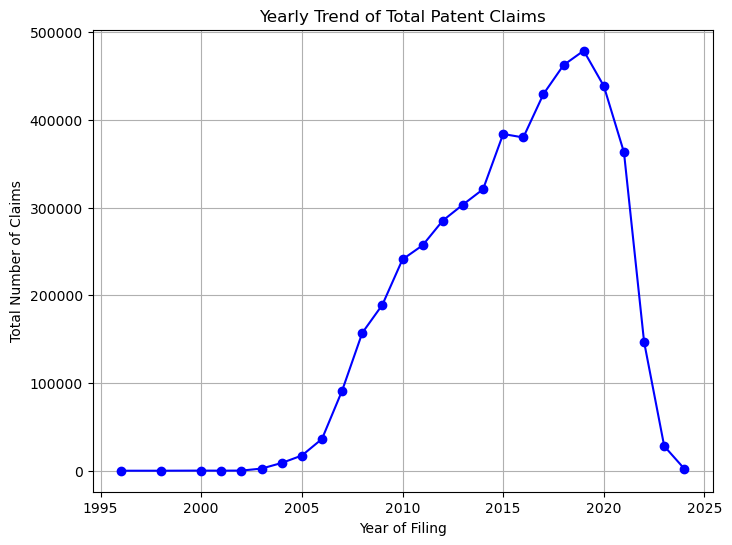

In [23]:
yearly_claims = df.groupby("FILING_YEAR")["NO_OF_CLAIMS"].sum()

plt.figure(figsize=(8, 6))
plt.plot(yearly_claims.index, yearly_claims.values, marker="o", linestyle="-", color="blue")
plt.xlabel("Year of Filing")
plt.ylabel("Total Number of Claims")
plt.title("Yearly Trend of Total Patent Claims")
plt.grid(True)

plt.show()

### Between 2017 and 2020, the number of claims was the highest, while from 2000 to 2005, it was the lowest.


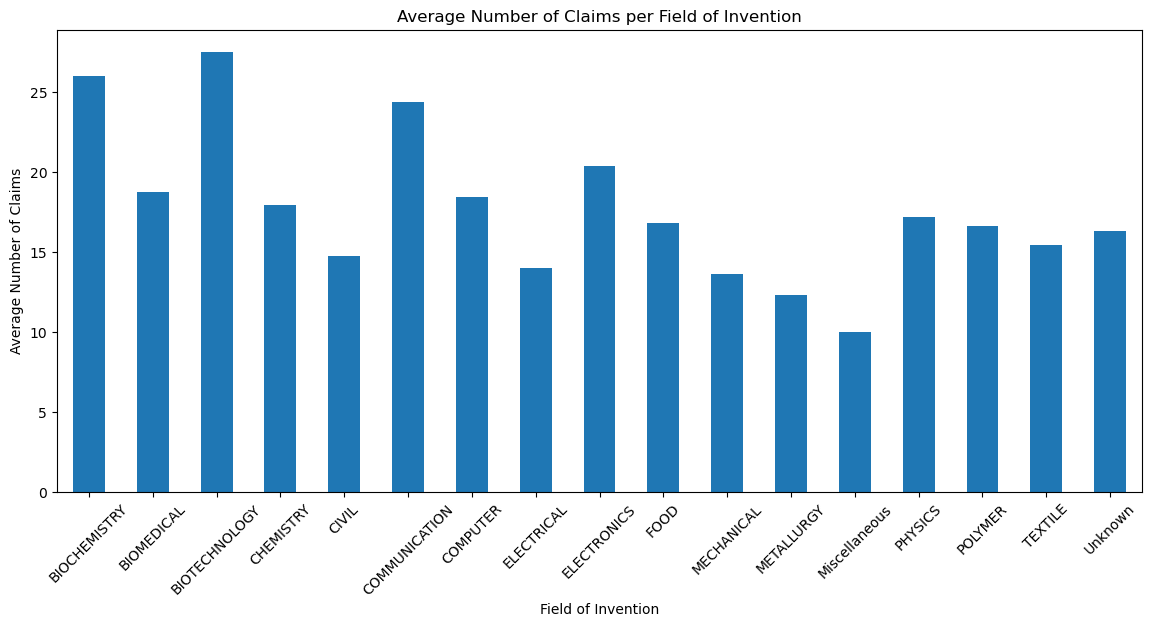

In [24]:
plt.figure(figsize=(14, 6))

field_avg_claims = df.groupby("FIELD_OF_INVENTION")["NO_OF_CLAIMS"].mean()
field_avg_claims.plot(kind="bar")

plt.xlabel("Field of Invention")
plt.ylabel("Average Number of Claims")
plt.title("Average Number of Claims per Field of Invention")
plt.xticks(rotation=45)
plt.show()


#### The highest average number of claims is in the fields of Biochemistry and Biotechnology, while the least is in Metallurgy.


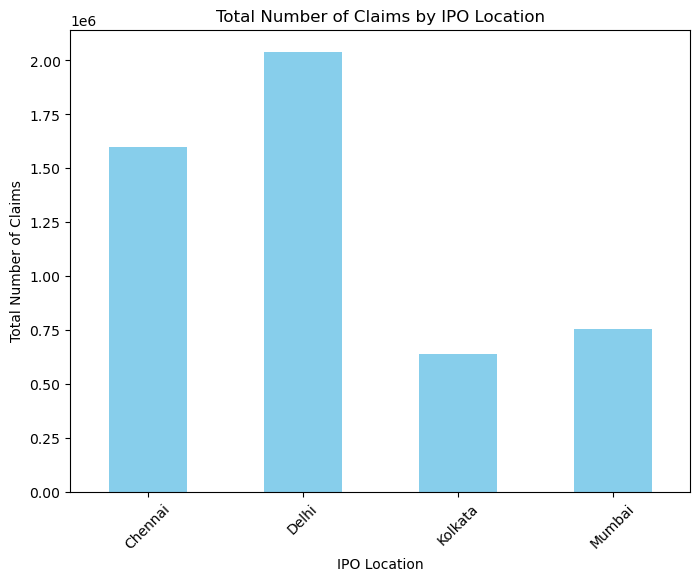

In [25]:
claims_by_location = df.groupby("IPO_LOCATION")["NO_OF_CLAIMS"].sum()

plt.figure(figsize=(8, 6))
claims_by_location.plot(kind="bar", color="skyblue")

plt.xlabel("IPO Location")
plt.ylabel("Total Number of Claims")
plt.title("Total Number of Claims by IPO Location")
plt.xticks(rotation=45)
plt.show()

#### Delhi has the highest number of claims, while Kolkata has the least number of claims.


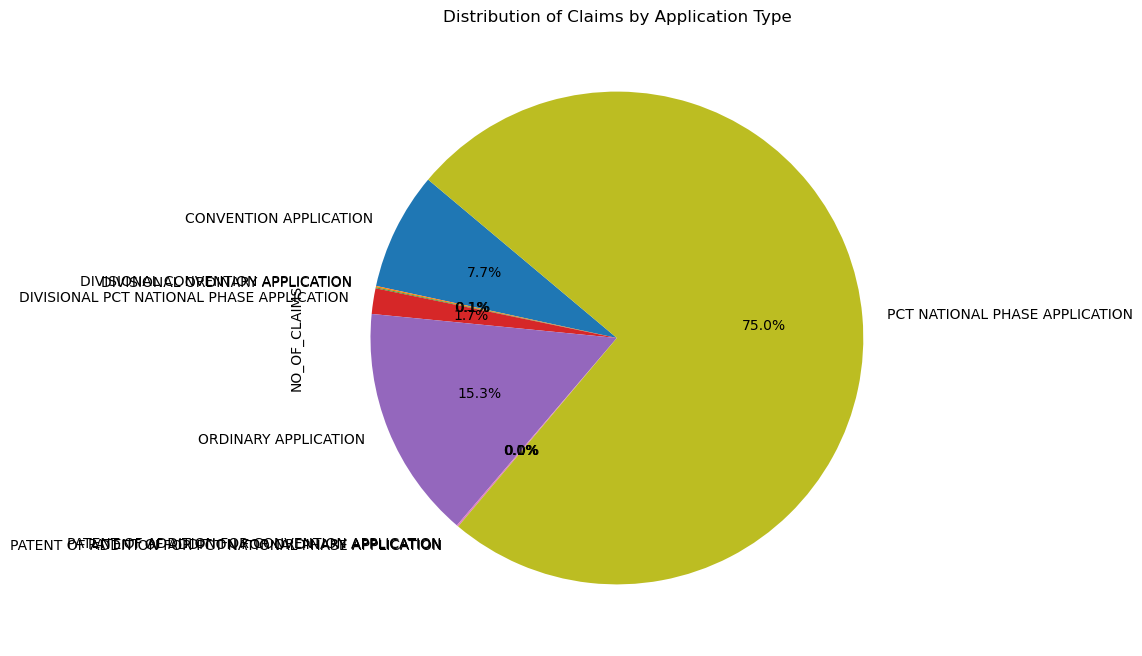

In [26]:
claims_by_app = df.groupby("APPLICATION_TYPE_DESC")["NO_OF_CLAIMS"].sum()
plt.figure(figsize=(8, 8))
claims_by_app.plot(
    kind="pie",
    autopct="%1.1f%%", 
    startangle=140,
)
plt.title("Distribution of Claims by Application Type")
plt.show()

#### The PCT National Phase application type has the highest number of claims compared to other types.


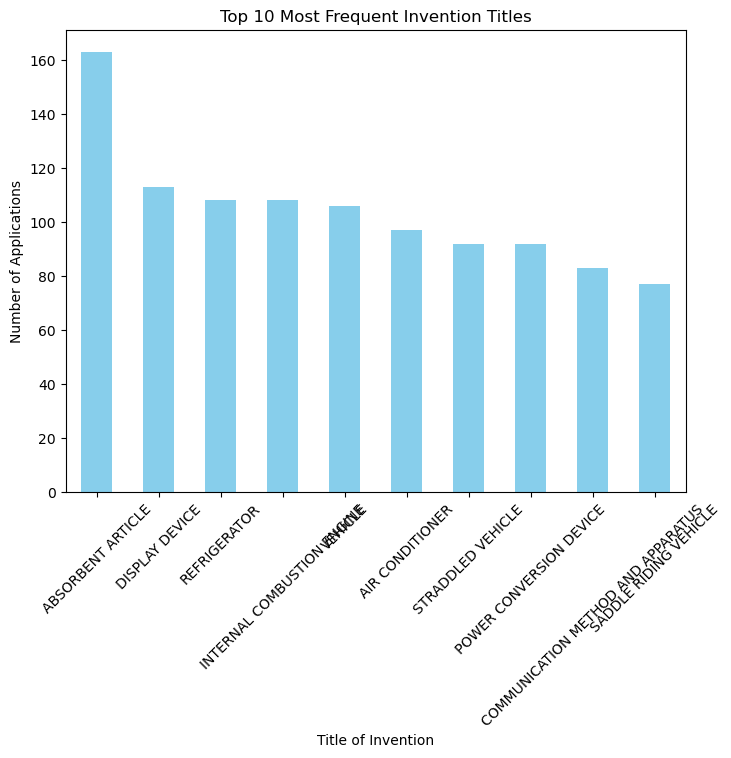

In [27]:
plt.figure(figsize=(8, 6))
df.TITLE_OF_INVENTION.value_counts().head(10).plot(kind="bar", color="skyblue")
plt.xlabel("Title of Invention")
plt.ylabel("Number of Applications")
plt.title("Top 10 Most Frequent Invention Titles")
plt.xticks(rotation=45)
plt.show()

#### "Absorbent Article" is the most frequent invention title.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286678 entries, 0 to 286677
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   PUBLICATION_NUMBER     286678 non-null  object        
 1   PUBLICATION_DATE       286678 non-null  datetime64[ns]
 2   IPO_LOCATION           286678 non-null  object        
 3   APPLICATION_TYPE_DESC  286678 non-null  object        
 4   APPLICATION_NUMBER     286678 non-null  object        
 5   DATE_OF_FILING         286678 non-null  datetime64[ns]
 6   TITLE_OF_INVENTION     286678 non-null  object        
 7   FIELD_OF_INVENTION     286678 non-null  object        
 8   NO_OF_PAGES            286678 non-null  int64         
 9   NO_OF_CLAIMS           286678 non-null  int64         
 10  Time_to_Grant          286678 non-null  int64         
 11  YEAR                   286678 non-null  int32         
 12  FILING_YEAR            286678 non-null  int3